<a href="https://colab.research.google.com/github/Artfulbd/Colab_NN/blob/master/First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [3]:
b_size = 10
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=b_size, shuffle=True)
testnset = torch.utils.data.DataLoader(test, batch_size=b_size, shuffle=True)

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [73]:
for data in trainset:
  x,y = data
  print(y)
  break

tensor([0, 4, 1, 9, 6, 6, 0, 7, 9, 8])


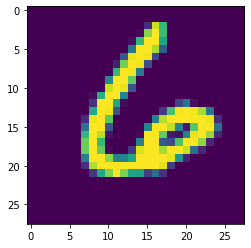

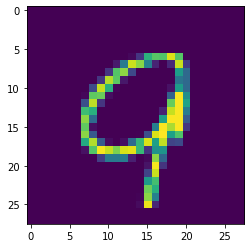

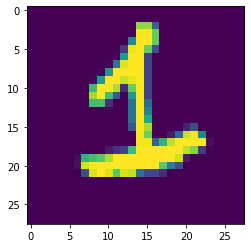

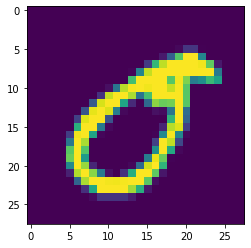

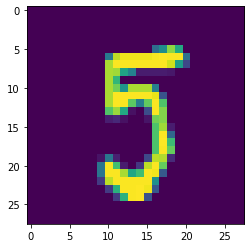

In [8]:
i = 1
for data in trainset:
    plt.imshow(data[0][0].view(28, 28))
    plt.show()
    if(i == 5):
        break
    i += 1

In [9]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
print(counter_dict)

for i in counter_dict:
    print(f"{i} : {counter_dict[i] / total * 100}")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [47]:
import torch.nn as nn
import torch.nn.functional as F

In [48]:
class Net(nn.Module):
   def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

   def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)

net  = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [55]:
x = torch.rand((28,28)).view(1, 784)
output = net(x)
print(output)

tensor([[-2.3957, -2.2628, -2.3857, -2.1964, -2.2483, -2.3845, -2.3293, -2.3085,
         -2.1818, -2.3616]], grad_fn=<LogSoftmaxBackward>)


In [62]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)
EPOCHS = 3
for epoch in range(EPOCHS):
  for data in trainset:
    x,y = data
    net.zero_grad()
    output = net(x.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0051, grad_fn=<NllLossBackward>)
tensor(0.0082, grad_fn=<NllLossBackward>)
tensor(0.0024, grad_fn=<NllLossBackward>)


In [64]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    x,y = data
    output = net(x.view(-1,28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1
print("Accuracy: ",round(correct/total, 3))

Accuracy:  0.979


tensor(6)


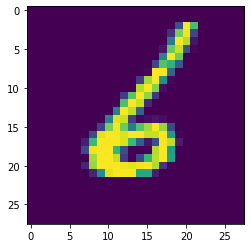

In [72]:
test_idx = 9
plt.imshow(x[test_idx].view(28,28))
plt.show
print(torch.argmax(net(x[test_idx].view(-1,28*28))[0]))

tensor(4)
